## Gather

In [1]:
import json
import glob
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading main data file

In [2]:
# Normal read_csv file to dataframe operations
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

### Getting Data from Twitter

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

### Creating dataframe from 'tweets-json.txt' file

In [3]:
# Creates dictionaries of required data by reading line-by-line and later convert to a DataFrame
df_list = []
filename = "tweet_json.txt"
with open(filename, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,'retweet_count': retweet_count,'favorite_count': favorite_count})
# Creating dataframe from 'tweets-json.txt' file
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df.to_csv('tweet.csv',index=False)

### Reading the created tweets data file

In [4]:
# Normal read_csv file to dataframe operations
tweets = pd.read_csv('tweet.csv')

### Downloading image predictions file as requested

In [5]:
# simple requests usage and saves file
filename = 'image-predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

### Reading the downloaded data file

In [6]:
# Normal read_csv file to dataframe operations
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')

## Assess

In [7]:
tweets.sample(5)

,tweet_id,retweet_count,favorite_count
2292,666644823164719104,75,220
1818,675853064436391936,1239,2597
1403,697630435728322560,529,1714
2086,670442337873600512,188,613
173,857062103051644929,158,0


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [9]:
tweets.tweet_id.duplicated().value_counts()

False    2331
Name: tweet_id, dtype: int64

In [10]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic_book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True


In [11]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_pred.query('p1_conf>p2_conf>p3_conf').count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [13]:
image_pred.query('p1_dog != True & p2_dog != True & p3_dog != True').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [14]:
image_pred.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [15]:
image_pred.duplicated().value_counts()

False    2075
dtype: int64

In [16]:
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [17]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
an             7
Daisy          7
Bailey         7
Toby           7
Stanley        6
Scout          6
Dave           6
Rusty          6
Oscar          6
Jax            6
Bella          6
Jack           6
Leo            6
Milo           6
Koda           6
Gus            5
            ... 
Bobby          1
Baron          1
Bluebert       1
Shooter        1
Mo             1
Holly          1
Pepper         1
Smiley         1
Grizz          1
Pippin         1
Ronduh         1
Rilo           1
Bodie          1
Pancake        1
Dallas         1
Freddery       1
Mason          1
Grizzwald      1
Beemo          1
Kevon          1
Asher          1
Dietrich       1
Lance          1
Dudley         1
Brudge         1
Zoe            1
Danny          1
Chuq          

In [20]:
twitter_arch.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [21]:
twitter_arch.duplicated().value_counts()

False    2356
dtype: int64

In [22]:
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
twitter_arch.query('rating_denominator > 10 | rating_denominator < 10').count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [24]:
twitter_arch.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [25]:
twitter_arch.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [26]:
twitter_arch.timestamp.max()

'2017-08-01 16:23:56 +0000'

In [27]:
twitter_arch.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


#### Quality
##### `twitter_arch` table
- 'source' coulmn have pure html tags.
- Missing in (in_reply_to_user_id - in_reply_to_status_id - in_reply_to_user_id columns) ***(can't clean)***
- Missing in (retweeted_status_id - retweeted_status_user_id - retweeted_status_timestamp columns) ***(can't clean)***
    - To fix the first 2 issues in quality we can just ignore the reply tweets and the retweets and and drop their data columns columns.
- Missing values in 'expanded_urls'
- Invalide 'rating_numerator' values (too high/wrong values)
- Invalide 'rating_denominator' values (too high/wrong values)
- Erroneous datatype (timestamp)
- Multiple rows in 'name' are [a , None,....] (data need to have only names or None)
- Multiple rows in (doggo, floofer, pupper, puppo) with [None] (try to fix from tweet text)

##### `image_pred` table
- Inconsistent upper/lower strings in 'p1' 'p2' 'p3'.

#### Tidiness
- Alternatively those rows can be stored separatly, each type of tweets in a different table.
- 1 variable in 4 columns in `twitter_arch` table (doggo, floofer, pupper and puppo)
- `tweets` should be part of the `twitter_arch` table
- It is better to have only one prediction column in `image_pred`
- Since in 'ratings_denominator' in `twitter_archive_master` should always be 10, this column can be dropped

## Clean

In [28]:
clean_twitter_arch = twitter_arch.copy()
clean_image_pred = image_pred.copy()
clean_tweets = tweets.copy()

### Missing Data

#### `twitter_arch`: Missing values rows from 6 columns ( 2000+)

#### Define
- Drop the rows with the missing data.
- Drop out the columns with missing data because their data aren't enough and will not be used anyway.

In [29]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [30]:
#droping the empty rows
clean_twitter_arch = twitter_arch.drop(twitter_arch.query('in_reply_to_status_id != "NaN"').index)
clean_twitter_arch = clean_twitter_arch.drop(clean_twitter_arch.query('retweeted_status_id != "NaN"').index)

In [31]:
#droping the empty columns
clean_twitter_arch = clean_twitter_arch.drop(columns=['in_reply_to_user_id'
                                                      ,'in_reply_to_status_id'
                                                      ,'in_reply_to_user_id'
                                                      ,'retweeted_status_id'
                                                      ,'retweeted_status_user_id'
                                                      ,'retweeted_status_timestamp'])

#### Test

In [32]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## Clean

#### `twitter_arch`: Missing values in extended urls (2094 instead of 2097)

#### Define
Create each row's extended url from its tweet_id

#### Code

In [33]:
missing = clean_twitter_arch[clean_twitter_arch['expanded_urls'].isnull()].copy()
test_twitter_arch = clean_twitter_arch.dropna().copy()

In [34]:
# required imports
import http.client
import urllib.parse
import re
import validators
#this needs to be installed via terminal first

#function to check if url is valid then unshorten it
def unshorten_url(url):
    if validators.url(url) == True:
        return requests.head(url, allow_redirects=True).url
    else:
        raise


# Looping through the whole dataframe to create new extended urls
for i in missing.index:
    # Matches urls found in text
    url = re.findall('(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)',missing['text'][i])
    # Checks in url has values
    if url:
        final = ""
        # Loops through url list
        for j in url:
            # Ignores not full urls
            if len(j) < 14:
                # None as a defult value if there is no urls
                final = "None"
                break
            else:
                final+=unshorten_url(j) + " "
    # None as a defult value if there is no urls
    else:
        final = "None"
    # Adds expanded urls to each record
    missing.loc[i,'expanded_urls'] = final

In [35]:
test_twitter_arch = test_twitter_arch.append(missing)
test_twitter_arch.expanded_urls = test_twitter_arch.expanded_urls.str.replace(',',' , ')
clean_twitter_arch = test_twitter_arch.copy()

#### Test

In [36]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 1445
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [37]:
pd.set_option('display.max_colwidth', -1)
clean_twitter_arch.expanded_urls.sample(5)

1553    https://twitter.com/dog_rates/status/688908934925697024/photo/1
2262    https://twitter.com/dog_rates/status/667546741521195010/photo/1
642     https://twitter.com/dog_rates/status/793210959003287553/photo/1
2159    https://twitter.com/dog_rates/status/669571471778410496/photo/1
2118    https://twitter.com/dog_rates/status/670420569653809152/photo/1
Name: expanded_urls, dtype: object

## Clean

#### `twitter_arch` 'source' coulmn have pure html tags.

#### Define
Strip the tags with a regex 

#### Code

In [38]:
for i in clean_twitter_arch.index:
    accu = re.findall('<a.*?>(.*?)</a>',clean_twitter_arch['source'][i])
    clean_twitter_arch.loc[i,'source'] = accu[-1]

#### Test

In [39]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 1445
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 293.0+ KB


## Clean

#### `twitter_arch` Invalide 'rating_numerator' and 'rating_denominator' values (too high/wrong values)

#### Define
Find the ratings with a better regex 

#### Code

In [40]:
higher = clean_twitter_arch.query('rating_denominator > 10').copy()

lower = clean_twitter_arch.query('rating_denominator < 10').copy()

clean_twitter_arch = clean_twitter_arch.query('rating_denominator == 10')

In [41]:
for i in higher.index:
    accu = re.findall('([+-]?((\d+(\.\d+)?)|(\.\d+))\/[+-]?((\d+(\.\d+)?)|(\.\d+)))',higher['text'][i])
    if accu:
        n,d = accu[-1][0].split('/')
        n = float(n)
        d = float(d)
        higher.loc[i,'rating_numerator'] = ((n*10)/d)
        higher.loc[i,'rating_denominator'] = 10
print("\n")
for i in lower.index:
    accu = re.findall('([1-9][0-9]*\/[1-9][0-9])',lower['text'][i])
    if accu:
        n,d = accu[-1].split('/')
        n = float(n)
        d = float(d)
        lower.loc[i,'rating_numerator'] = ((n*10)/d)
        lower.loc[i,'rating_denominator'] = 10

In [42]:
#My own rating to row 516 as it is the only one with no valid rating in 'lower' df^^
lower.loc[516,'rating_numerator'] = 24/2
lower.loc[516,'rating_denominator'] = 10

In [43]:
clean_twitter_arch = clean_twitter_arch.append(higher)
clean_twitter_arch = clean_twitter_arch.append(lower)

In [44]:
very_high = clean_twitter_arch.query('100 > rating_numerator > 15').copy()

clean_twitter_arch = clean_twitter_arch.query('rating_numerator <= 15 | rating_numerator >= 100').copy()

In [45]:
for i in very_high.index:
    accu = re.findall('([+-]?((\d+(\.\d+)?)|(\.\d+))\/[1-9][0-9])',very_high['text'][i])
    if accu:
        n,d = accu[-1][0].split('/')
        n = float(n)
        d = float(d)
        very_high.loc[i,'rating_numerator'] = ((n*10)/d)
        very_high.loc[i,'rating_denominator'] = 10

In [46]:
clean_twitter_arch = clean_twitter_arch.append(very_high)

#### Test

In [47]:
clean_twitter_arch.query('rating_numerator > 15 | rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,None,None,None,None,None


In [48]:
clean_twitter_arch['rating_numerator'].describe()

count    2097.000000
mean     11.648679  
std      39.628501  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [49]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 1712
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 213.0+ KB


## Clean

### Erroneous datatypes
#### `twitter_arch`  (timestamp) the others are dropped
#### `Clean_retweeted` (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
#### `Clean_in_reply_to`(in_reply_to_status_id , in_reply_to_user_id)

#### Define
Just changing the data type

#### Code

In [50]:
clean_twitter_arch.timestamp = pd.to_datetime(clean_twitter_arch.timestamp)

#### Test

In [51]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 1712
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 213.0+ KB


## Clean

##### 'name' column in `clean_twitter_arch` had many none name strings, 

#### Define

changing them to either names from text or non using a regex

#### Code

In [52]:
names = clean_twitter_arch[clean_twitter_arch.name.str.islower() == True].copy()

clean_twitter_arch = clean_twitter_arch[clean_twitter_arch.name.str.islower() == False]

In [53]:
names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10,a,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22+00:00,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1 , https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57+00:00,Twitter Web Client,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10.0,10,not,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17+00:00,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1 , https://twitter.com/dog_rates/status/828650029636317184/photo/1 , https://twitter.com/dog_rates/status/828650029636317184/photo/1",14.0,10,one,None,None,None,None
542,806219024703037440,2016-12-06 19:29:28+00:00,Twitter for iPhone,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11.0,10,incredibly,None,None,None,None
649,792913359805018113,2016-10-31 02:17:31+00:00,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,"https://twitter.com/dog_rates/status/792913359805018113/photo/1 , https://twitter.com/dog_rates/status/792913359805018113/photo/1 , https://twitter.com/dog_rates/status/792913359805018113/photo/1 , https://twitter.com/dog_rates/status/792913359805018113/photo/1",13.0,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12+00:00,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1 , https://twitter.com/dog_rates/status/772581559778025472/photo/1 , https://twitter.com/dog_rates/status/772581559778025472/photo/1",10.0,10,a,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18+00:00,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11.0,10,very,None,None,None,None


In [54]:
for i in names.index:
    accu = re.findall('((?:^|\W)This is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)this is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)Meet(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)meet(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)name is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)hello to(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)Here is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)here is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)That is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)that is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?)',names['text'][i])
    print(accu)
    if accu:
        print("True")
        sentence = accu[-1].split(' ')
        pup = sentence[-1].replace('.','')
        names.loc[i,'name'] = pup
    else:
        print("False")
        names.loc[i,'name'] = "None"

[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[' name is Zoey.']
True
[]
False
[]
False
['That is Quizno.']
True
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[' name is Daryl.']
True
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False


In [55]:
clean_twitter_arch = clean_twitter_arch.append(names)

In [56]:
names = clean_twitter_arch[clean_twitter_arch.name == "None"].copy()

clean_twitter_arch = clean_twitter_arch[clean_twitter_arch.name != "None"]

In [57]:
for i in names.index:
    accu = re.findall('((?:^|\W)This is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)this is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)Meet(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)meet(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)name is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)hello to(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)Here is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)here is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)That is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?|(?:^|\W)that is(?:$|\W)(?<!^)[A-Z][a-z]+[\.]?)',names['text'][i])
    print(accu)
    if accu:
        print("True")
        sentence = accu[-1][0].split(' ')
        pup = sentence[-1].replace('.','')
        names.loc[i,'name'] = pup
    else:
        print("False")
        names.loc[i,'name'] = "None"

[]
False
[]
False
[]
False
[]
False
[]
False
[' name is Howard.']
True
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[' name is Zoey']
True
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[' this is Blue.']
True
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False
[]
False


In [58]:
clean_twitter_arch = clean_twitter_arch.append(names)

#### Test

In [59]:
clean_twitter_arch.name.value_counts()

None          697
Charlie       11 
Lucy          11 
Oliver        10 
Cooper        10 
Tucker        9  
Penny         9  
Winston       8  
Sadie         8  
Lola          8  
Toby          7  
Daisy         7  
              7  
Bo            6  
Oscar         6  
Bella         6  
Koda          6  
Stanley       6  
Bailey        6  
Jax           6  
Rusty         5  
Scout         5  
Louis         5  
Leo           5  
Bentley       5  
Dave          5  
Chester       5  
Milo          5  
Buddy         5  
Sophie        4  
             ..  
Major         1  
Dante         1  
Walker        1  
Bloo          1  
Asher         1  
Grizz         1  
Billy         1  
Grizzwald     1  
Gustaf        1  
Moreton       1  
Brandonald    1  
Keet          1  
Gòrdón        1  
Astrid        1  
Arlo          1  
Vixen         1  
Beckham       1  
Willie        1  
Emmy          1  
Pippin        1  
Ronduh        1  
Rilo          1  
Bodie         1  
Augie         1  
Harper    

## Clean

##### dog stage columns in `clean_twitter_arch` had many none name strings

#### Define
Tried to find the definitions' keywords in 'text' columns but that did not find anymore values

#### Code

In [60]:
stage = clean_twitter_arch.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"').copy()

clean_twitter_arch = clean_twitter_arch.query('doggo != "None" | floofer != "None" | pupper != "None" | puppo != "None"')

In [61]:
doggo = ['doggo ','big pupper']
floofer = ['floofer','floof ','floof','fluf']
pupper = ['pupper','small doggo']
puppo = ['puppo ','teen']
for i in stage.index:
    if any(ele in stage['text'] for ele in doggo):
        stage.loc[i,'doggo'] = "doggo"
    if any(ele in stage['text'] for ele in floofer):
        stage.loc[i,'floofer'] = "floofer"
    if any(ele in stage['text'] for ele in pupper):
        stage.loc[i,'pupper'] = "pupper"
    if any(ele in stage['text'] for ele in puppo):
        stage.loc[i,'puppo'] = "puppo"
    else:
        stage.loc[i,'doggo'] = "None"
        stage.loc[i,'floofer'] = "None"
        stage.loc[i,'pupper'] = "None"
        stage.loc[i,'puppo'] = "None"

In [62]:
clean_twitter_arch = clean_twitter_arch.append(stage)

#### Test

In [63]:
stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2335
Data columns (total 12 columns):
tweet_id              1761 non-null int64
timestamp             1761 non-null datetime64[ns, UTC]
source                1761 non-null object
text                  1761 non-null object
expanded_urls         1761 non-null object
rating_numerator      1761 non-null float64
rating_denominator    1761 non-null int64
name                  1761 non-null object
doggo                 1761 non-null object
floofer               1761 non-null object
pupper                1761 non-null object
puppo                 1761 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 258.9+ KB


In [64]:
clean_twitter_arch.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2335
Data columns (total 12 columns):
tweet_id              1761 non-null int64
timestamp             1761 non-null datetime64[ns, UTC]
source                1761 non-null object
text                  1761 non-null object
expanded_urls         1761 non-null object
rating_numerator      1761 non-null float64
rating_denominator    1761 non-null int64
name                  1761 non-null object
doggo                 1761 non-null object
floofer               1761 non-null object
pupper                1761 non-null object
puppo                 1761 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 178.9+ KB


## Clean

##### `image_pred` table has inconsistent upper/lower strings in 'p1' 'p2' 'p3'.

#### Define
Just change that with a simple single line for every column

#### Code

In [65]:
clean_image_pred.p1 = clean_image_pred.p1.str.title().str.replace('_',' ')
clean_image_pred.p2 = clean_image_pred.p2.str.title().str.replace('_',' ')
clean_image_pred.p3 = clean_image_pred.p3.str.title().str.replace('_',' ')

#### Test

In [66]:
clean_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,Redbone,0.484855,True,Beagle,0.437527,True,Basset,0.010585,True
1733,821407182352777218,https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg,1,Irish Setter,0.505496,True,Vizsla,0.168747,True,Chesapeake Bay Retriever,0.111311,True
2001,876484053909872640,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,Golden Retriever,0.874566,True,Irish Terrier,0.037354,True,Chow,0.016724,True
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese Dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint Bernard,0.995143,True,Cardigan,0.003044,True,English Springer,0.001050,True


## Clean

##### `image_pred` making sure it refers to only one prediction for easier analysis

#### Define
Check in each prediction column if it was a dog and store the one with higher p_config, if not just save the highest p_config

#### Code

In [67]:
one_pred = clean_image_pred.copy()
one_pred['prediction'] = one_pred['p1'].copy()
one_pred['prediction_config'] = one_pred['p1_conf'].copy()
one_pred['prediction_dog'] = one_pred['p1_dog'].copy()
for i in one_pred.index:
    if one_pred['p1_dog'][i] == True:
        pass
    elif one_pred['p2_dog'][i] == True:
        one_pred.loc[i,'prediction'] = one_pred['p2'][i]
        one_pred.loc[i,'prediction_config'] = one_pred['p2_conf'][i]
        one_pred.loc[i,'prediction_dog'] = one_pred['p2_dog'][i]
    elif one_pred['p3_dog'][i] == True:
        one_pred.loc[i,'prediction'] = one_pred['p3'][i]
        one_pred.loc[i,'prediction_config'] = one_pred['p3_conf'][i]
        one_pred.loc[i,'prediction_dog'] = one_pred['p3_dog'][i]

In [68]:
#droping the rest of the columns columns
one_pred = one_pred.drop(columns=['p1'
                                ,'p1_conf'
                                ,'p1_dog'
                                ,'p2'
                                ,'p2_conf'
                                ,'p2_dog'
                                ,'p3'
                                ,'p3_conf'
                                ,'p3_dog'])

In [69]:
clean_image_pred = one_pred.copy()

#### Test

In [70]:
clean_image_pred.sample(5)

,tweet_id,jpg_url,img_num,prediction,prediction_config,prediction_dog
1165,735274964362878976,https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg,1,Studio Couch,0.944692,False
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese Dog,0.579472,True
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,Flamingo,0.992710,False
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American Staffordshire Terrier,0.569501,True


## Clean

###### 1 variable in 4 columns in `twitter_arch` table (doggo, floofer, pupper and puppo)

#### Define
creating a new coulmn 'dog_stage' and filling it with one of the values for each row

#### Code

In [71]:
doggo = clean_twitter_arch.query('doggo != "None"').copy()
doggo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 9 to 1063
Data columns (total 12 columns):
tweet_id              83 non-null int64
timestamp             83 non-null datetime64[ns, UTC]
source                83 non-null object
text                  83 non-null object
expanded_urls         83 non-null object
rating_numerator      83 non-null float64
rating_denominator    83 non-null int64
name                  83 non-null object
doggo                 83 non-null object
floofer               83 non-null object
pupper                83 non-null object
puppo                 83 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 8.4+ KB


In [72]:
stage_doggo = np.repeat('doggo', doggo.shape[0])
doggo['dog_stage'] = stage_doggo

In [73]:
floofer = clean_twitter_arch.query('floofer != "None"').copy()
floofer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 46 to 1534
Data columns (total 12 columns):
tweet_id              10 non-null int64
timestamp             10 non-null datetime64[ns, UTC]
source                10 non-null object
text                  10 non-null object
expanded_urls         10 non-null object
rating_numerator      10 non-null float64
rating_denominator    10 non-null int64
name                  10 non-null object
doggo                 10 non-null object
floofer               10 non-null object
pupper                10 non-null object
puppo                 10 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 1.0+ KB


In [74]:
stage_floofer = np.repeat('floofer', floofer.shape[0])
floofer['dog_stage'] = stage_floofer

In [75]:
pupper = clean_twitter_arch.query('pupper != "None"').copy()
pupper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 29 to 1936
Data columns (total 12 columns):
tweet_id              230 non-null int64
timestamp             230 non-null datetime64[ns, UTC]
source                230 non-null object
text                  230 non-null object
expanded_urls         230 non-null object
rating_numerator      230 non-null float64
rating_denominator    230 non-null int64
name                  230 non-null object
doggo                 230 non-null object
floofer               230 non-null object
pupper                230 non-null object
puppo                 230 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 23.4+ KB


In [76]:
stage_pupper = np.repeat('pupper', pupper.shape[0])
pupper['dog_stage'] = stage_pupper

In [77]:
puppo = clean_twitter_arch.query('puppo != "None"').copy()
puppo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 14 to 947
Data columns (total 12 columns):
tweet_id              24 non-null int64
timestamp             24 non-null datetime64[ns, UTC]
source                24 non-null object
text                  24 non-null object
expanded_urls         24 non-null object
rating_numerator      24 non-null float64
rating_denominator    24 non-null int64
name                  24 non-null object
doggo                 24 non-null object
floofer               24 non-null object
pupper                24 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 2.4+ KB


In [78]:
stage_puppo = np.repeat('puppo', puppo.shape[0])
puppo['dog_stage'] = stage_puppo

In [79]:
clean_twitter_arch = clean_twitter_arch.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"')
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2335
Data columns (total 12 columns):
tweet_id              1761 non-null int64
timestamp             1761 non-null datetime64[ns, UTC]
source                1761 non-null object
text                  1761 non-null object
expanded_urls         1761 non-null object
rating_numerator      1761 non-null float64
rating_denominator    1761 non-null int64
name                  1761 non-null object
doggo                 1761 non-null object
floofer               1761 non-null object
pupper                1761 non-null object
puppo                 1761 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 178.9+ KB


In [80]:
stage_none = np.repeat('none', clean_twitter_arch.shape[0])
clean_twitter_arch['dog_stage'] = stage_none

In [81]:
clean_twitter_arch = clean_twitter_arch.append(doggo)
clean_twitter_arch = clean_twitter_arch.append(floofer)
clean_twitter_arch = clean_twitter_arch.append(pupper)
clean_twitter_arch = clean_twitter_arch.append(puppo)
clean_twitter_arch = clean_twitter_arch.drop(columns=['doggo'
                                                ,'floofer'
                                                ,'pupper'
                                                ,'puppo'])

In [82]:
clean_twitter_arch = clean_twitter_arch.drop_duplicates(subset='tweet_id', keep="first")

#### Test

In [83]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 947
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 163.8+ KB


## Clean

- `tweets` should be part of the `twitter_arch` table

#### Define
Merging both dataframes on tweet_id column

#### Code

In [84]:
twitter_archive_master = clean_twitter_arch.merge(clean_tweets,on='tweet_id',how='inner')

#### Test

In [85]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 11 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null datetime64[ns, UTC]
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2090 non-null object
rating_numerator      2090 non-null float64
rating_denominator    2090 non-null int64
name                  2090 non-null object
dog_stage             2090 non-null object
retweet_count         2090 non-null int64
favorite_count        2090 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 195.9+ KB


#### Define
Merging both dataframes on tweet_id column

#### Code

In [86]:
twitter_archive_master = twitter_archive_master.merge(clean_image_pred,on='tweet_id',how='inner')

#### Test

In [87]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 16 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns, UTC]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dog_stage             1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
prediction            1964 non-null object
prediction_config     1964 non-null float64
prediction_dog        1964 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(5), object(7)
memory usage: 247.4+ KB


## Clean

###### Since in 'rating_denominator' in `twitter_archive_master` should always be 10, this column can be dropped
###### jpg_url and epanded_urls are redundant remove jpg_url

#### Define

#### Code

In [88]:
twitter_archive_master = twitter_archive_master.drop(columns=['rating_denominator'])
twitter_archive_master = twitter_archive_master.drop(columns=['jpg_url'])

#### Test

In [89]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 14 columns):
tweet_id             1964 non-null int64
timestamp            1964 non-null datetime64[ns, UTC]
source               1964 non-null object
text                 1964 non-null object
expanded_urls        1964 non-null object
rating_numerator     1964 non-null float64
name                 1964 non-null object
dog_stage            1964 non-null object
retweet_count        1964 non-null int64
favorite_count       1964 non-null int64
img_num              1964 non-null int64
prediction           1964 non-null object
prediction_config    1964 non-null float64
prediction_dog       1964 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(4), object(6)
memory usage: 216.7+ KB


## Clean

###### Saving the cleaned dataframes into csv files

In [90]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Insights and Visaulisations

In [91]:
df = pd.read_csv('twitter_archive_master.csv')

### Does tweets with higher ratings recieve higher favourite counts ?

In [92]:
rating_median = df.rating_numerator.median()
low_rating = df.query('rating_numerator < @rating_median')
high_rating = df.query('rating_numerator > @rating_median')
mean_count_low = low_rating.favorite_count.mean()
mean_count_high = high_rating.favorite_count.mean()

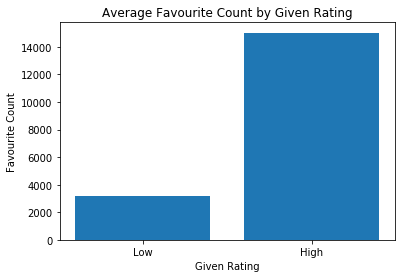

In [93]:
locations = [1, 2]
heights = [mean_count_low, mean_count_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Favourite Count by Given Rating')
plt.xlabel('Given Rating')
plt.ylabel('Favourite Count');

### Does tweets with higher ratings recieve higher retweet counts ?

In [94]:
rating_median = df.rating_numerator.median()
low_rating = df.query('rating_numerator < @rating_median')
high_rating = df.query('rating_numerator > @rating_median')
mean_count_low = low_rating.retweet_count.mean()
mean_count_high = high_rating.retweet_count.mean()

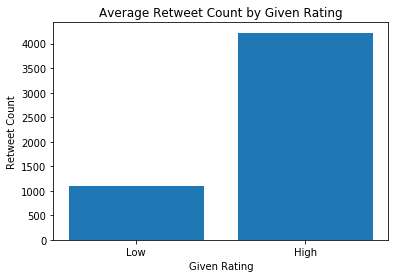

In [95]:
locations = [1, 2]
heights = [mean_count_low, mean_count_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Retweet Count by Given Rating')
plt.xlabel('Given Rating')
plt.ylabel('Retweet Count');

### What is the most frequent Dog name ?

In [96]:
df.query('name != "None"').name.describe()

count     1345  
unique    912   
top       Oliver
freq      10    
Name: name, dtype: object

### What is the most frequent Dog breeds ?

In [97]:
df.prediction.describe()

count     1964            
unique    319             
top       Golden Retriever
freq      156             
Name: prediction, dtype: object

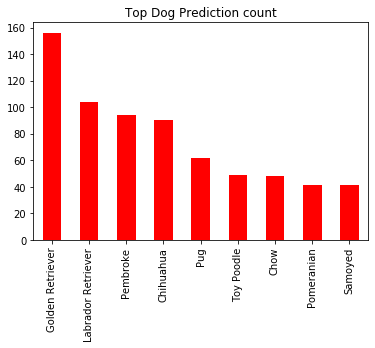

In [98]:
top_preds = df.prediction.value_counts()
top_preds = top_preds[top_preds > 40]
top_preds.plot.bar(color = 'red')
plt.title('Top Dog Prediction count');

### Skewness of Ratings

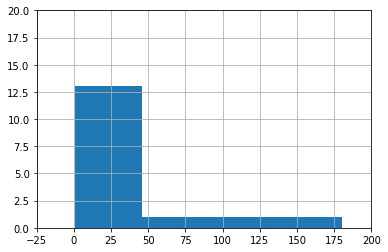

In [99]:
df.rating_numerator.value_counts().hist()
plt.axis([-25,200,0,20]);

### Skewness of Favourite Count

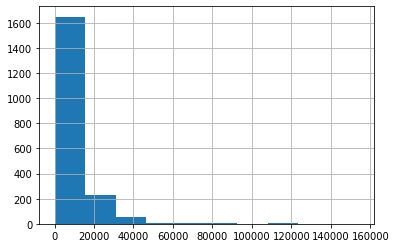

In [100]:
df.favorite_count.hist();

### Skewness of Retweet Count

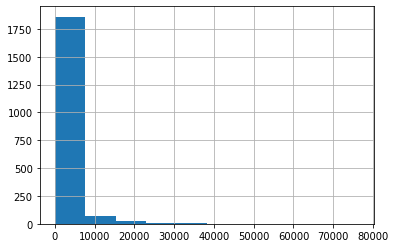

In [101]:
df.retweet_count.hist();

### A chart for different source of tweets

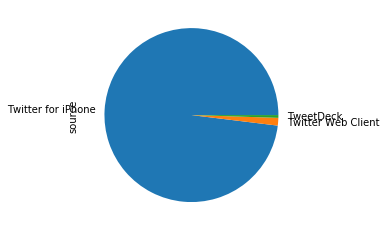

In [102]:
df.source.value_counts().plot.pie(subplots=True);